In [1]:
# Required Packages
from sklearn import datasets  # To Get iris dataset
import pandas as pd 
from sklearn import svm  
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [2]:

# import iris data to model Svm classifier
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [3]:
#looking at the first 5 values of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Visualizing the relationship between sepal and target classes

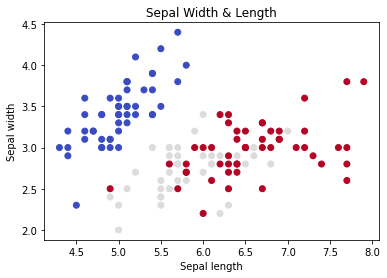

In [4]:
def visuvalize_sepal_data():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()
   
 
visuvalize_sepal_data()

# Visualizing the relationship between Petal and target classes

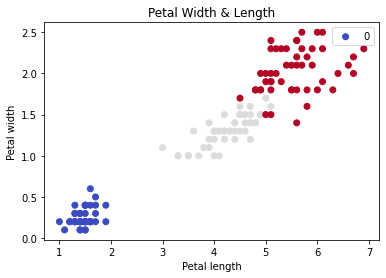

In [5]:
def visuvalize_petal_data():
    iris = datasets.load_iris()
    X = iris.data[:, 2:]  # we only take the last two features.
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y,label ="target", cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.legend(["0", "1"])
    plt.show()
 
visuvalize_petal_data()

# Test-Train Split and feature scaling

In [6]:
#perofrming the label encoding and converting the target columns to numerical values
from sklearn import preprocessing                                               #calling the library
label_encoder = preprocessing.LabelEncoder()                                    #performing labelencoder
df['target']= label_encoder.fit_transform(df['target'])                         #performing label encoder
df['target'].unique()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df['target'] = df['target'].astype('int')                     #converting the target columsn to int datatype

In [8]:
#Spliting the dataset in independent and dependent variables
X = df.iloc[:,:4].values                                #splitting the dataframe with features as X variable
y = df['target'].values                                 #splitting the dataframe target vaiable as Y variable
X                                                       #printing the X variable

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split                                             #importing the train test module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)   #splitting the data into train and test dataset

In [10]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler                               #importing the feature scaling variable
sc = StandardScaler()                                                          #declaring the variable
X_train = sc.fit_transform(X_train)                                            #feature scaling the X_train dataset
X_test = sc.transform(X_test)                                                  #feature scaling the X_test dataset


# Using Linear Kernel.

In [11]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_l = svcclassifier.predict(X_test)
print(y_pred_l)

[2 2 0 0 0 2 1 1 2 1 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.967
Precision: 0.970
F1 Score: 0.967
Recall Score: 0.967


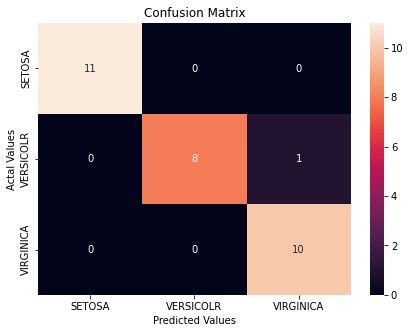

In [12]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_l, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_l, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_l, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_l, y_test, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test, y_pred_l)                                #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using polynomial kernel

In [13]:
# Fitting SVC Classification to the Training set with polynomial kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_p = svcclassifier.predict(X_test)
print(y_pred_p)

[2 2 0 0 0 1 1 1 1 1 1 1 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.933
Precision: 0.947
F1 Score: 0.934
Recall Score: 0.933


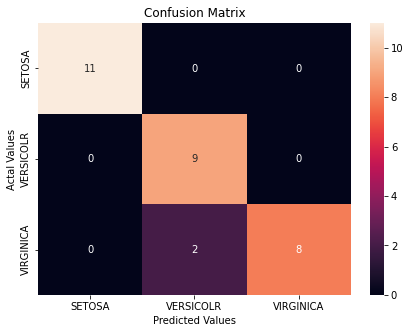

In [14]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_p, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_p, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_p, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_p, y_test, average='weighted'))    #predicting the recall score

cm = confusion_matrix(y_test, y_pred_p)                                     #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using rbf kernel

In [15]:
# Fitting SVC Classification to the Training set with rbf kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0)
svcclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_r = svcclassifier.predict(X_test)
print(y_pred_r)

[2 2 0 0 0 2 1 1 1 1 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.933
Precision: 0.933
F1 Score: 0.933
Recall Score: 0.933


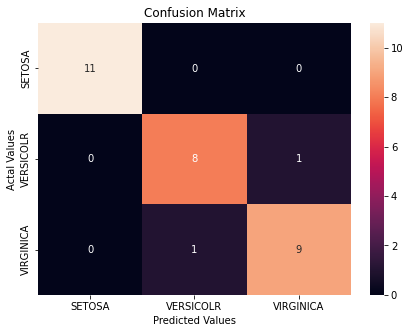

In [16]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_r, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_r, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_r, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_r, y_test, average='weighted'))    #predicting the recall score

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred_r)                                               #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using sigmoid kernel

In [17]:
# Fitting SVC Classification to the Training set with sigmoid kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svcclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_s = svcclassifier.predict(X_test)
print(y_pred_s)

[2 2 0 0 0 2 1 2 2 2 2 2 0 0 0 0 2 2 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.833
Precision: 0.926
F1 Score: 0.849
Recall Score: 0.833


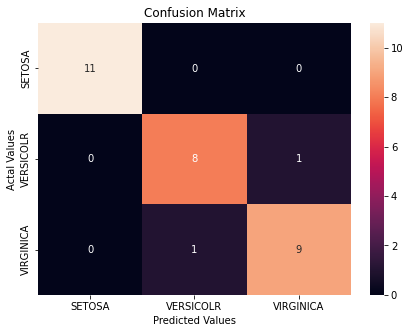

In [18]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_s, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_s, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_s, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_s, y_test, average='weighted'))    #predicting the recall score

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred_r)                                           #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Performing the SVD operation on the IRIS Dataset

In [19]:
#Spliting the dataset in independent and dependent variables
C = df.iloc[:,:4].values
C = sc.fit_transform(C)
C

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [20]:
U,S,V=np.linalg.svd(C) #performing the SVD values for the df1

In [21]:
S #printing the S matrix

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [22]:
V #printing the V matrix

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [23]:
U #printing the U matrix

array([[-1.08239531e-01, -4.09957970e-02,  2.72186462e-02, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-9.94577561e-02,  5.75731483e-02,  5.00034005e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.12996303e-01,  2.92000319e-02, -9.42089147e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.27030413e-02, -2.29793601e-02, -3.84023516e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 6.56112167e-02, -8.63643414e-02, -1.98939364e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 4.59137323e-02,  2.07800179e-03, -1.12588405e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

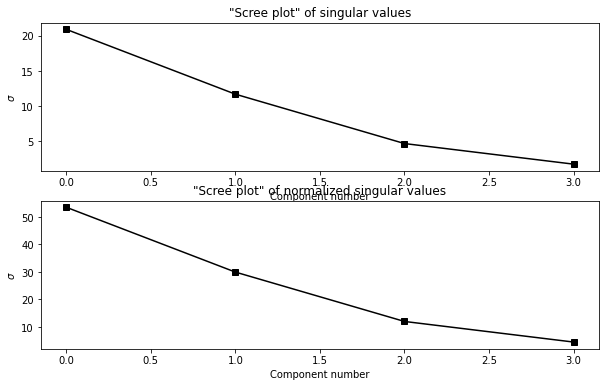

In [24]:
#calculuting and printing S values vs component and normalized S values and components 
D=S
D=(D/D.sum())*100

fig = plt.subplots(1,figsize=(10,6))
plt.subplot(211)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.subplot(212)
plt.plot(D,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of normalized singular values')

plt.show()

In [25]:
Unew=U[:,:2] #creating new U matrix
Snew=S[:2]   #creating new S matrix
Vnew=V[:2,:] #creating new V matrix

In [26]:
Xnew=np.dot(Unew,np.dot(np.diag(Snew),Vnew))  # creating new X matrix using above coordinates
Xnew.shape
#Xnew=np.dot(Unew,np.diag(Snew))

(150, 4)

In [27]:
#calculting the logic for calculating the size reduction in thr matrix
error=(Xnew*C)*(Xnew*C)               
pctdiff=np.linalg.norm(Xnew-C)/np.linalg.norm(C)
pctdiff

0.2046165389209377

In [28]:
#splitting the data to tetsing and training set
from sklearn.model_selection import train_test_split  #splitting the data to tetsing and training set
X_train_svd, X_test_svd,y_train_svd, y_test_svd = train_test_split(Xnew,y,test_size = 0.20, random_state = 82)

# Using Linear Kernel.

In [29]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train_svd, y_train_svd)
# Predicting the Test set results
y_pred_svdl = svcclassifier.predict(X_test_svd)
print(y_pred_svdl)

[2 2 0 0 0 2 1 2 2 2 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.900
Precision: 0.933
F1 Score: 0.903
Recall Score: 0.900


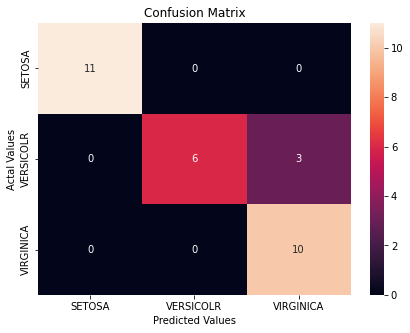

In [30]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_svdl, y_test_svd))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_svdl, y_test_svd,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_svdl, y_test_svd, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_svdl, y_test_svd, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_svd, y_pred_svdl)                             #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using Polynomial Kernel

In [31]:
# Fitting SVC Classification to the Training set with polynomial kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train_svd, y_train_svd)
# Predicting the Test set results
y_pred_svdp = svcclassifier.predict(X_test_svd)
print(y_pred_svdp)

[2 2 0 0 0 2 1 1 1 1 1 1 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.900
Precision: 0.903
F1 Score: 0.900
Recall Score: 0.900


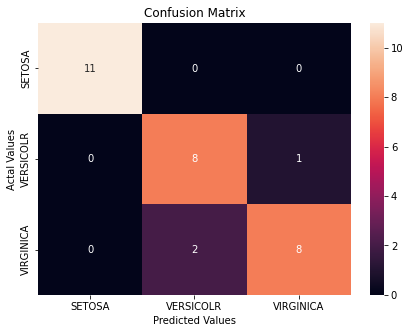

In [32]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_svdp, y_test_svd))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_svdp, y_test_svd,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_svdp, y_test_svd, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_svdp, y_test_svd, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_svd, y_pred_svdp)                                         #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using rbf kernel

In [33]:
# Fitting SVC Classification to the Training set with rbf kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0,C=3)
svcclassifier.fit(X_train_svd, y_train_svd)
# Predicting the Test set results
y_pred_svdr = svcclassifier.predict(X_test_svd)
print(y_pred_svdr)

[2 2 0 0 0 2 1 2 1 2 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.867
Precision: 0.882
F1 Score: 0.869
Recall Score: 0.867


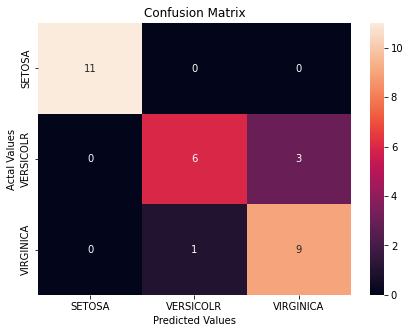

In [34]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_svdr, y_test_svd))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_svdr, y_test_svd,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_svdr, y_test_svd, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_svdr, y_test_svd, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_svd, y_pred_svdr)                                        #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using sigmoid kernel

In [35]:
# Fitting SVC Classification to the Training set with sigmoid kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svcclassifier.fit(X_train_svd, y_train_svd)
# Predicting the Test set results
y_pred_svds = svcclassifier.predict(X_test_svd)
print(y_pred_svds)

[2 2 0 0 0 2 1 2 1 2 2 2 0 0 0 0 2 2 0 1 0 2 0 2 2 1 2 0 2 1]


Accuracy Score: 0.800
Precision: 0.861
F1 Score: 0.812
Recall Score: 0.800


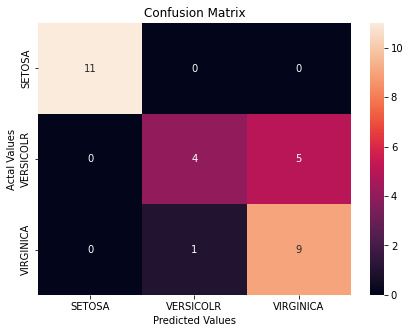

In [36]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_svds, y_test_svd))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_svds, y_test_svd,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_svds, y_test_svd, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_svds, y_test_svd, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_svd, y_pred_svds)                                 #printing the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,5))
sn.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Rank of original matrix

In [37]:
rank = np.linalg.matrix_rank(X)
print('Rank of Original Matrix : ',rank)

Rank of Original Matrix :  4


# Rank of SVD derived matrix

In [39]:
rank_new = np.linalg.matrix_rank(Xnew)
print('Rank of SVD Derived Matrix : ',rank_new)

Rank of SVD Derived Matrix :  2
